# Housing Prices Assignment

This assignment aims to build a deep artificial neural network fora classification problem using the California Housing Prices dataset. The problem consists of estimating the approximate location of housing blocks. The approximate location is represented with a discrete variable called ocean_proximity which may have one of four possible values: NEAR BAY, 1H OCEAN, INLAND, and NEAR OCEAN.

## Implementation

### Preprocesing

The data provided is split into input features and labels. The instances corresponding to the value "ISLAND" for the ocean_proximity variable have been removed because there is not enough data forthe learning process, as well as instances with missing data.

Regarding the transformations within the data, the input features features have been normalized,which means they have similar orders of magnitude, specifically in the range [−1,1]. This can be done with the method MinMaxScaler in the package preprocessing of sklearn. Besides, the labels recieved have been one-hot encoded, so no further preprocessing was required.

Finally, the data was shuffled and divided manually according to the following percentages:

- Train set: 80%, being a total of 16342 rows.
- Validation set: 10%, being a total of 2044 rows.
- Test set: 10%, being a total of 2042 rows.

## Architecture

Our ffNN structure for the dataset is based on three dense layers with decreasing number of nodes and dropout between each layer. In order to choose the number of nodes, dropout parameters, learning rates and optimizers we made use of hyperparameter tuning. Here are some of the tested components:

- Dense layers sizes: As we previously commented, we experimented with different sizes per layer, inthe range of [32, 64, 128, 256, 512, 700]
- Dropout: It was used for reduce overfitting in our neural network by preventing complex co-adaptation on training data. The values we tested with were: [0.05, 0.1, 0.15, 0.2, 0.25].
- Optimizers: Adam, Adamax, Nadam and SGD.
- Activation Functions: Relu and LeakyRelu.
- Learning Rate: 1e−03, 1e−04.

## Results

The best results obtained were:

- Train Accuracy and Loss: 96.73% and 0.0844.
- Validation Accuracy and Loss: 95.84% and 0.11.
- Test Accuracy and Loss: 97.11% and 0.0836. Elapsed time: 0.1172.

## Authors

- Student Name 1: Stefano Baggetto
- Student Name 2: Giorgio Segalla
- Student Name 3: Angel Igareta ([angel@igareta.com](angel@igareta.com))

## Imports

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from time import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization

from tensorboard.plugins.hparams import api as hp

## Dataset

### Clean Attributes

In [ ]:
attributes_file_path = "/content/drive/My Drive/Colab Notebooks/Deep Learning/Assignment 4/data/OceanProximityPreparedCleanAttributes.csv" 
attributes_file = pd.read_csv(attributes_file_path) 

In [ ]:
attributes_file

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.013944,-0.630181,0.568627,-0.906760,-0.903786,-0.961882,-0.899030,-0.393415,0.415256
1,-0.555777,0.086079,-0.019608,-0.991861,-0.991930,-0.995347,-0.992107,-0.741369,-0.494843
2,0.099602,-0.419766,0.254902,-0.939570,-0.932961,-0.959976,-0.935866,-0.706170,-0.726595
3,0.302789,-0.759830,-0.725490,-0.893382,-0.894165,-0.949270,-0.892123,0.001228,0.352163
4,-0.599602,0.060574,0.019608,-0.830256,-0.851024,-0.924269,-0.849696,-0.060951,0.854017
...,...,...,...,...,...,...,...,...,...
20423,0.203187,-0.634431,0.294118,-0.908693,-0.887647,-0.947028,-0.880941,-0.498766,-0.289483
20424,-0.509960,0.015940,0.294118,-0.948522,-0.923960,-0.946803,-0.929617,-0.670832,-0.350514
20425,-0.442231,0.392136,0.176471,-0.912203,-0.887027,-0.934752,-0.874034,-0.862636,-0.841646
20426,0.031873,-0.632306,-0.333333,-0.592655,-0.522657,-0.776956,-0.512580,-0.504752,-0.086598


In [ ]:
# min_max_scaler = preprocessing.MinMaxScaler()X_scale = min_max_scaler.fit_transform(X)
# Say that this has already been done to the dataset

### One-Hot encoded classes

In [ ]:
classes_file_path = "/content/drive/My Drive/Colab Notebooks/Deep Learning/Assignment 4/data/OceanProximityOneHotEncodedClasses.csv"
classes_file = pd.read_csv(classes_file_path) 

In [ ]:
classes_file

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
20423,1.0,0.0,0.0,0.0
20424,1.0,0.0,0.0,0.0
20425,0.0,1.0,0.0,0.0
20426,0.0,0.0,0.0,1.0


## Dataset Preparation

In [ ]:
dataset = attributes_file.values
classes = classes_file.values

dataset, classes = shuffle(dataset, classes)

In [ ]:
TRAIN_PERCENTAGE = 0.8
TEST_PERCENTAGE = 0.1

train_index_limit = int(TRAIN_PERCENTAGE * len(dataset))
test_index_limit = int(train_index_limit + TEST_PERCENTAGE * len(dataset))

In [ ]:
train_dataset = dataset[:train_index_limit]
train_classes = classes[:train_index_limit]
test_dataset = dataset[train_index_limit:test_index_limit]
test_classes = classes[train_index_limit:test_index_limit]
val_dataset = dataset[test_index_limit:]
val_classes = classes[test_index_limit:]

In [ ]:
print("Train length: " + str(len(train_dataset)))
print("Test length: " + str(len(test_dataset)))
print("Val length: " + str(len(val_dataset)))

Train length: 16342
Test length: 2042
Val length: 2044


## Neural Network Preparation 

## Utils

In [ ]:
def visualize_accuracy(data):
  # Visualize model
  plt.plot(data.history['accuracy'])
  plt.plot(data.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def visualize_loss(data): 
  plt.plot(data.history['loss'])
  plt.plot(data.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

## Neural Network Training

### Model 1

In [ ]:
model_1 = Sequential()

model_1.add(Dense(64, input_shape=(9,)))
model_1.add(LeakyReLU())

model_1.add(Dense(128))
model_1.add(LeakyReLU())

model_1.add(Dense(64))
model_1.add(LeakyReLU())

model_1.add(Dense(4, activation='softmax'))

optimizer = tf.optimizers.Adam(learning_rate=0.00001)
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_data_1 = model_1.fit(train_dataset, train_classes,
          batch_size=32,
          epochs=200,
          verbose = 2,
          validation_data=(val_dataset, val_classes))

Epoch 1/200
511/511 - 1s - loss: 1.2243 - accuracy: 0.5653 - val_loss: 1.1661 - val_accuracy: 0.5920
Epoch 2/200
511/511 - 1s - loss: 1.1220 - accuracy: 0.5977 - val_loss: 1.0842 - val_accuracy: 0.5988
Epoch 3/200
511/511 - 1s - loss: 1.0480 - accuracy: 0.6060 - val_loss: 1.0165 - val_accuracy: 0.6081
Epoch 4/200
511/511 - 1s - loss: 0.9865 - accuracy: 0.6246 - val_loss: 0.9593 - val_accuracy: 0.6385
Epoch 5/200
511/511 - 1s - loss: 0.9346 - accuracy: 0.6565 - val_loss: 0.9115 - val_accuracy: 0.6614
Epoch 6/200
511/511 - 1s - loss: 0.8928 - accuracy: 0.6757 - val_loss: 0.8754 - val_accuracy: 0.6747
Epoch 7/200
511/511 - 1s - loss: 0.8610 - accuracy: 0.6904 - val_loss: 0.8473 - val_accuracy: 0.6888
Epoch 8/200
511/511 - 1s - loss: 0.8358 - accuracy: 0.7031 - val_loss: 0.8251 - val_accuracy: 0.6972
Epoch 9/200
511/511 - 1s - loss: 0.8152 - accuracy: 0.7129 - val_loss: 0.8064 - val_accuracy: 0.7084
Epoch 10/200
511/511 - 1s - loss: 0.7979 - accuracy: 0.7200 - val_loss: 0.7903 - val_accura

KeyboardInterrupt: ignored

In [ ]:
start = time()
loss, acc = model_1.evaluate(test_dataset, test_classes, verbose=1)
end = time()
print('NN took ' + str(end - start) + ' seconds')

visualize_accuracy(model_data_1)
visualize_loss(model_data_1)

### Model 2

In [ ]:
model_2 = Sequential()

model_2.add(Dense(256, input_shape=(9,)))
model_2.add(LeakyReLU())

model_2.add(Dense(128))
model_2.add(LeakyReLU())

model_2.add(Dense(64))
model_2.add(LeakyReLU())

model_2.add(Dense(32))
model_2.add(LeakyReLU())

model_2.add(Dense(4, activation='softmax'))

optimizer = tf.optimizers.Adam(learning_rate=0.00001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_data_2 = model_2.fit(train_dataset, train_classes,
          batch_size=32,
          epochs=200,
          verbose = 2,
          validation_data=(val_dataset, val_classes))

In [ ]:
start = time()
loss, acc = model_2.evaluate(test_dataset, test_classes, verbose=1)
end = time()
print('NN took ' + str(end - start) + ' seconds')

visualize_accuracy(model_data_2)
visualize_loss(model_data_2)

## Hyperparameter tuning

In [ ]:
def get_hyper_model(hparams):
  model = Sequential()

  model.add(Dense(hparams[HP_NUM_UNITS] * 2, input_shape=(9,)))
  model.add(LeakyReLU())
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Dense(hparams[HP_NUM_UNITS]))
  model.add(LeakyReLU())
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Dense(hparams[HP_NUM_UNITS]))
  model.add(LeakyReLU())
  model.add(Dropout(hparams[HP_DROPOUT]))

  model.add(Dense(4, activation='softmax'))

  model.compile(optimizer=hparams[HP_OPTIMIZER], loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([256, 512]))
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.05, 0.1, 0.15]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adamax', 'nadam']))

In [ ]:
def train_model(model, epochs = 150, verbose = 0):
  data = model.fit(train_dataset, train_classes,
          batch_size=32,
          epochs=100,
          verbose = 1,
          validation_data=(val_dataset, val_classes))
  
  print(data.history.items)

  start = time()
  loss, acc = model.evaluate(test_dataset, test_classes, verbose=1)
  end = time()
  print('ffNN took ' + str(end - start) + ' seconds')

  return data

--- Starting trial: run-0
{'num_units': 256, 'optimizer': 'adamax', 'dropout': 0.05}
Epoch 1/100
511/511 [==============================] - 3s 5ms/step - loss: 0.6287 - accuracy: 0.7601 - val_loss: 0.4727 - val_accuracy: 0.8107
Epoch 2/100
511/511 [==============================] - 2s 5ms/step - loss: 0.4315 - accuracy: 0.8263 - val_loss: 0.3768 - val_accuracy: 0.8410
Epoch 3/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3728 - accuracy: 0.8456 - val_loss: 0.3391 - val_accuracy: 0.8503
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3446 - accuracy: 0.8598 - val_loss: 0.3447 - val_accuracy: 0.8567
Epoch 5/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3248 - accuracy: 0.8674 - val_loss: 0.3206 - val_accuracy: 0.8664
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3109 - accuracy: 0.8719 - val_loss: 0.2888 - val_accuracy: 0.8860
Epoch 7/100
511/511 [==============================] - 3s

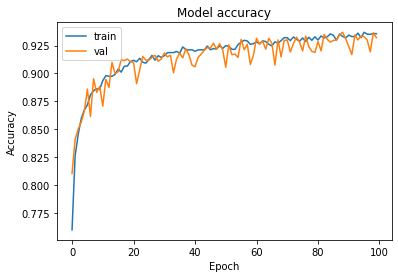

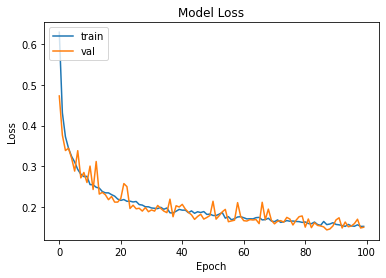

--- Starting trial: run-1
{'num_units': 256, 'optimizer': 'adamax', 'dropout': 0.1}
Epoch 1/100
511/511 [==============================] - 3s 5ms/step - loss: 0.6479 - accuracy: 0.7497 - val_loss: 0.5119 - val_accuracy: 0.7823
Epoch 2/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4426 - accuracy: 0.8155 - val_loss: 0.4063 - val_accuracy: 0.8258
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3812 - accuracy: 0.8408 - val_loss: 0.3366 - val_accuracy: 0.8630
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3509 - accuracy: 0.8577 - val_loss: 0.3229 - val_accuracy: 0.8591
Epoch 5/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3332 - accuracy: 0.8593 - val_loss: 0.3071 - val_accuracy: 0.8606
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3165 - accuracy: 0.8685 - val_loss: 0.2902 - val_accuracy: 0.8772
Epoch 7/100
511/511 [==============================] - 2s 

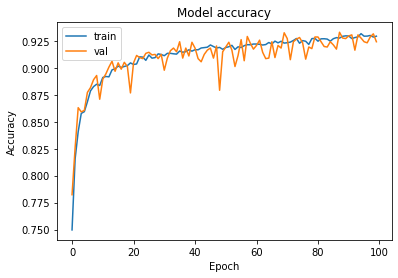

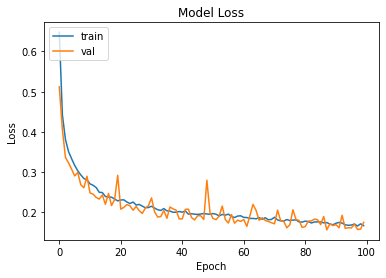

--- Starting trial: run-2
{'num_units': 256, 'optimizer': 'adamax', 'dropout': 0.15}
Epoch 1/100
511/511 [==============================] - 3s 5ms/step - loss: 0.6615 - accuracy: 0.7467 - val_loss: 0.4951 - val_accuracy: 0.7847
Epoch 2/100
511/511 [==============================] - 3s 5ms/step - loss: 0.4686 - accuracy: 0.8117 - val_loss: 0.4000 - val_accuracy: 0.8361
Epoch 3/100
511/511 [==============================] - 2s 5ms/step - loss: 0.4104 - accuracy: 0.8295 - val_loss: 0.3706 - val_accuracy: 0.8376
Epoch 4/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3695 - accuracy: 0.8481 - val_loss: 0.3299 - val_accuracy: 0.8689
Epoch 5/100
511/511 [==============================] - 3s 5ms/step - loss: 0.3502 - accuracy: 0.8556 - val_loss: 0.3255 - val_accuracy: 0.8762
Epoch 6/100
511/511 [==============================] - 2s 5ms/step - loss: 0.3273 - accuracy: 0.8657 - val_loss: 0.2986 - val_accuracy: 0.8796
Epoch 7/100
511/511 [==============================] - 3s

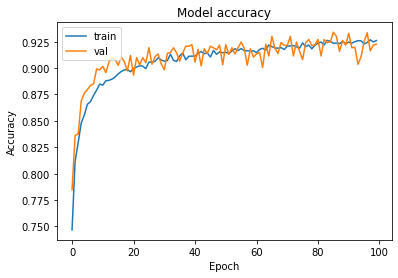

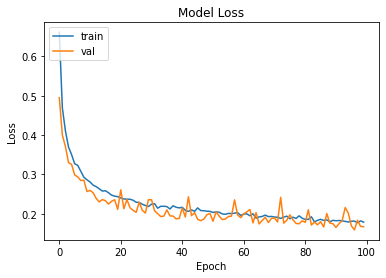

--- Starting trial: run-3
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.05}
Epoch 1/100
511/511 [==============================] - 4s 7ms/step - loss: 0.5603 - accuracy: 0.7777 - val_loss: 0.3614 - val_accuracy: 0.8615
Epoch 2/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3716 - accuracy: 0.8489 - val_loss: 0.3122 - val_accuracy: 0.8723
Epoch 3/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3176 - accuracy: 0.8709 - val_loss: 0.2881 - val_accuracy: 0.8885
Epoch 4/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2930 - accuracy: 0.8801 - val_loss: 0.3798 - val_accuracy: 0.8439
Epoch 5/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2812 - accuracy: 0.8855 - val_loss: 0.2622 - val_accuracy: 0.8914
Epoch 6/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2653 - accuracy: 0.8926 - val_loss: 0.3041 - val_accuracy: 0.8806
Epoch 7/100
511/511 [==============================] - 3s 

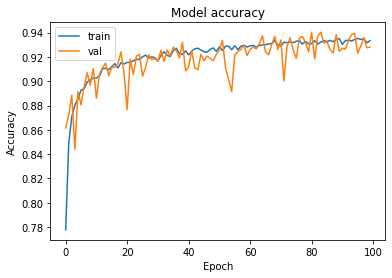

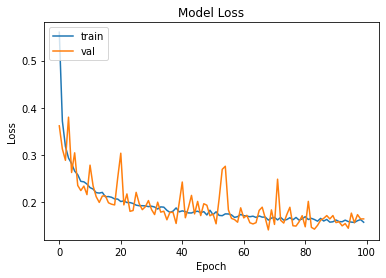

--- Starting trial: run-4
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.1}
Epoch 1/100
511/511 [==============================] - 3s 7ms/step - loss: 0.5747 - accuracy: 0.7703 - val_loss: 0.4079 - val_accuracy: 0.8420
Epoch 2/100
511/511 [==============================] - 3s 6ms/step - loss: 0.3852 - accuracy: 0.8391 - val_loss: 0.3405 - val_accuracy: 0.8542
Epoch 3/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3337 - accuracy: 0.8659 - val_loss: 0.3210 - val_accuracy: 0.8748
Epoch 4/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3070 - accuracy: 0.8754 - val_loss: 0.2640 - val_accuracy: 0.8963
Epoch 5/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2932 - accuracy: 0.8806 - val_loss: 0.2594 - val_accuracy: 0.8929
Epoch 6/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2760 - accuracy: 0.8878 - val_loss: 0.2513 - val_accuracy: 0.8933
Epoch 7/100
511/511 [==============================] - 3s 7

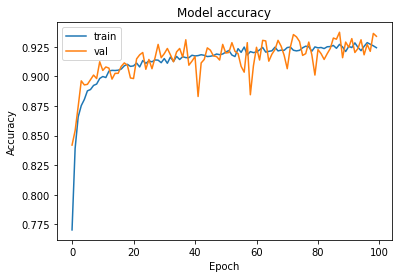

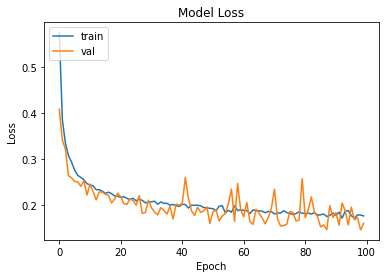

--- Starting trial: run-5
{'num_units': 256, 'optimizer': 'nadam', 'dropout': 0.15}
Epoch 1/100
511/511 [==============================] - 3s 7ms/step - loss: 0.5842 - accuracy: 0.7694 - val_loss: 0.3871 - val_accuracy: 0.8366
Epoch 2/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3993 - accuracy: 0.8377 - val_loss: 0.3442 - val_accuracy: 0.8669
Epoch 3/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3473 - accuracy: 0.8591 - val_loss: 0.3395 - val_accuracy: 0.8586
Epoch 4/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3200 - accuracy: 0.8694 - val_loss: 0.2920 - val_accuracy: 0.8787
Epoch 5/100
511/511 [==============================] - 3s 7ms/step - loss: 0.3011 - accuracy: 0.8785 - val_loss: 0.2552 - val_accuracy: 0.8987
Epoch 6/100
511/511 [==============================] - 3s 7ms/step - loss: 0.2921 - accuracy: 0.8801 - val_loss: 0.2695 - val_accuracy: 0.8816
Epoch 7/100
511/511 [==============================] - 3s 

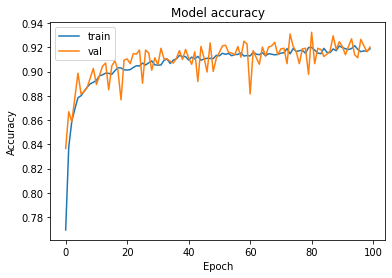

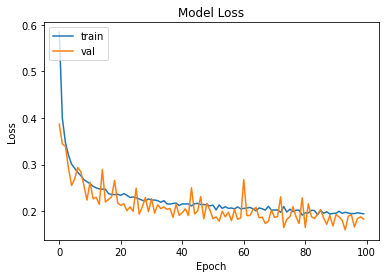

--- Starting trial: run-6
{'num_units': 512, 'optimizer': 'adamax', 'dropout': 0.05}
Epoch 1/100
511/511 [==============================] - 7s 15ms/step - loss: 0.5565 - accuracy: 0.7803 - val_loss: 0.3891 - val_accuracy: 0.8439
Epoch 2/100
511/511 [==============================] - 7s 14ms/step - loss: 0.3834 - accuracy: 0.8418 - val_loss: 0.3318 - val_accuracy: 0.8669
Epoch 3/100
511/511 [==============================] - 7s 14ms/step - loss: 0.3455 - accuracy: 0.8575 - val_loss: 0.3634 - val_accuracy: 0.8576
Epoch 4/100
511/511 [==============================] - 7s 14ms/step - loss: 0.3130 - accuracy: 0.8739 - val_loss: 0.2762 - val_accuracy: 0.8943
Epoch 5/100
511/511 [==============================] - 8s 15ms/step - loss: 0.2943 - accuracy: 0.8801 - val_loss: 0.3350 - val_accuracy: 0.8650
Epoch 6/100
511/511 [==============================] - 7s 14ms/step - loss: 0.2827 - accuracy: 0.8831 - val_loss: 0.2664 - val_accuracy: 0.8870
Epoch 7/100
511/511 [==============================

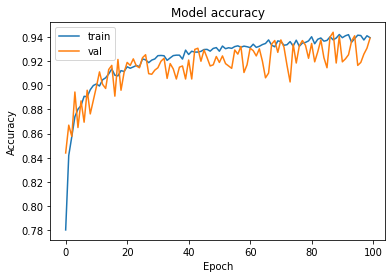

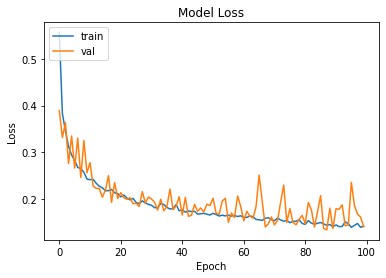

--- Starting trial: run-7
{'num_units': 512, 'optimizer': 'adamax', 'dropout': 0.1}
Epoch 1/100
511/511 [==============================] - 8s 15ms/step - loss: 0.5768 - accuracy: 0.7722 - val_loss: 0.4720 - val_accuracy: 0.8214
Epoch 2/100
511/511 [==============================] - 7s 15ms/step - loss: 0.3961 - accuracy: 0.8367 - val_loss: 0.3631 - val_accuracy: 0.8464
Epoch 3/100
511/511 [==============================] - 8s 15ms/step - loss: 0.3356 - accuracy: 0.8610 - val_loss: 0.3460 - val_accuracy: 0.8337
Epoch 4/100
511/511 [==============================] - 7s 15ms/step - loss: 0.3184 - accuracy: 0.8695 - val_loss: 0.3482 - val_accuracy: 0.8640
Epoch 5/100
511/511 [==============================] - 8s 15ms/step - loss: 0.3061 - accuracy: 0.8735 - val_loss: 0.2769 - val_accuracy: 0.8870
Epoch 6/100
511/511 [==============================] - 8s 15ms/step - loss: 0.2901 - accuracy: 0.8816 - val_loss: 0.2823 - val_accuracy: 0.8875
Epoch 7/100
511/511 [==============================]

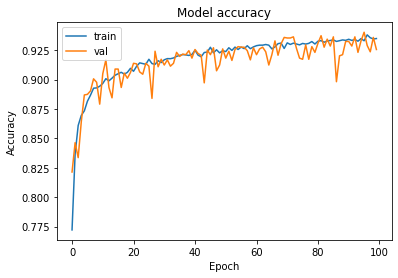

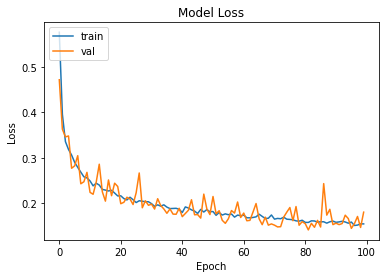

--- Starting trial: run-8
{'num_units': 512, 'optimizer': 'adamax', 'dropout': 0.15}
Epoch 1/100
511/511 [==============================] - 7s 14ms/step - loss: 0.5938 - accuracy: 0.7673 - val_loss: 0.4566 - val_accuracy: 0.8038
Epoch 2/100
511/511 [==============================] - 7s 14ms/step - loss: 0.4037 - accuracy: 0.8346 - val_loss: 0.3505 - val_accuracy: 0.8532
Epoch 3/100
511/511 [==============================] - 7s 15ms/step - loss: 0.3602 - accuracy: 0.8535 - val_loss: 0.3764 - val_accuracy: 0.8302
Epoch 4/100
511/511 [==============================] - 7s 14ms/step - loss: 0.3342 - accuracy: 0.8653 - val_loss: 0.3519 - val_accuracy: 0.8689
Epoch 5/100
511/511 [==============================] - 7s 15ms/step - loss: 0.3154 - accuracy: 0.8708 - val_loss: 0.3002 - val_accuracy: 0.8801
Epoch 6/100
511/511 [==============================] - 7s 14ms/step - loss: 0.3044 - accuracy: 0.8791 - val_loss: 0.3628 - val_accuracy: 0.8679
Epoch 7/100
511/511 [==============================

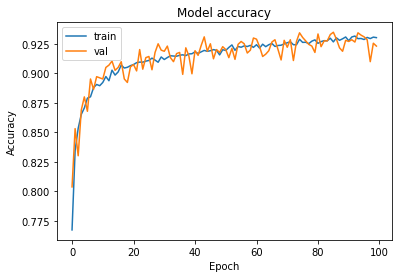

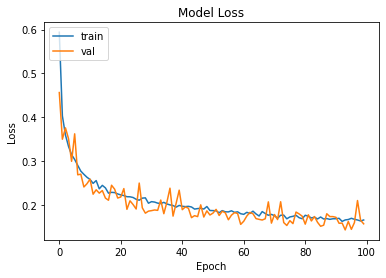

--- Starting trial: run-9
{'num_units': 512, 'optimizer': 'nadam', 'dropout': 0.05}
Epoch 1/100
511/511 [==============================] - 10s 20ms/step - loss: 0.5469 - accuracy: 0.7843 - val_loss: 0.3833 - val_accuracy: 0.8488
Epoch 2/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3705 - accuracy: 0.8497 - val_loss: 0.2997 - val_accuracy: 0.8743
Epoch 3/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3316 - accuracy: 0.8642 - val_loss: 0.3185 - val_accuracy: 0.8792
Epoch 4/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3002 - accuracy: 0.8768 - val_loss: 0.2787 - val_accuracy: 0.8836
Epoch 5/100
511/511 [==============================] - 10s 20ms/step - loss: 0.2874 - accuracy: 0.8825 - val_loss: 0.2695 - val_accuracy: 0.8860
Epoch 6/100
511/511 [==============================] - 10s 20ms/step - loss: 0.2670 - accuracy: 0.8909 - val_loss: 0.2543 - val_accuracy: 0.8943
Epoch 7/100
511/511 [=========================

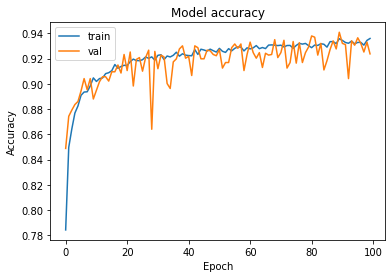

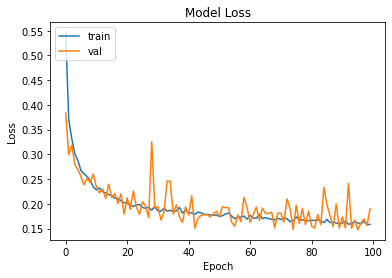

--- Starting trial: run-10
{'num_units': 512, 'optimizer': 'nadam', 'dropout': 0.1}
Epoch 1/100
511/511 [==============================] - 10s 20ms/step - loss: 0.5549 - accuracy: 0.7766 - val_loss: 0.3891 - val_accuracy: 0.8420
Epoch 2/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3750 - accuracy: 0.8457 - val_loss: 0.3690 - val_accuracy: 0.8346
Epoch 3/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3357 - accuracy: 0.8640 - val_loss: 0.3154 - val_accuracy: 0.8772
Epoch 4/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3153 - accuracy: 0.8725 - val_loss: 0.3538 - val_accuracy: 0.8611
Epoch 5/100
511/511 [==============================] - 10s 20ms/step - loss: 0.2966 - accuracy: 0.8798 - val_loss: 0.2761 - val_accuracy: 0.8880
Epoch 6/100
511/511 [==============================] - 10s 20ms/step - loss: 0.2815 - accuracy: 0.8875 - val_loss: 0.4871 - val_accuracy: 0.8107
Epoch 7/100
511/511 [=========================

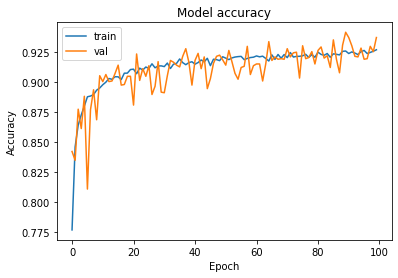

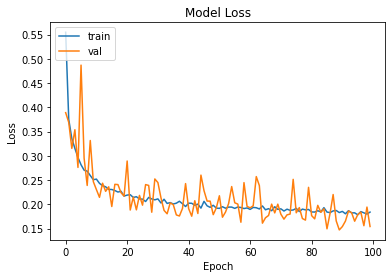

--- Starting trial: run-11
{'num_units': 512, 'optimizer': 'nadam', 'dropout': 0.15}
Epoch 1/100
511/511 [==============================] - 10s 20ms/step - loss: 0.5794 - accuracy: 0.7701 - val_loss: 0.4688 - val_accuracy: 0.8068
Epoch 2/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3903 - accuracy: 0.8428 - val_loss: 0.3968 - val_accuracy: 0.8508
Epoch 3/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3459 - accuracy: 0.8614 - val_loss: 0.2896 - val_accuracy: 0.8792
Epoch 4/100
511/511 [==============================] - 10s 20ms/step - loss: 0.3153 - accuracy: 0.8717 - val_loss: 0.3228 - val_accuracy: 0.8689
Epoch 5/100
511/511 [==============================] - 11s 21ms/step - loss: 0.3011 - accuracy: 0.8772 - val_loss: 0.2721 - val_accuracy: 0.8855
Epoch 6/100
511/511 [==============================] - 11s 21ms/step - loss: 0.2945 - accuracy: 0.8780 - val_loss: 0.2502 - val_accuracy: 0.8938
Epoch 7/100
511/511 [========================

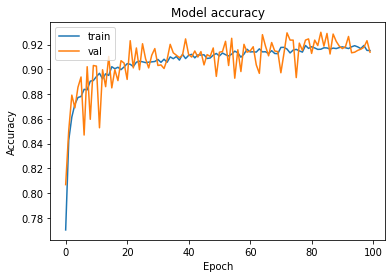

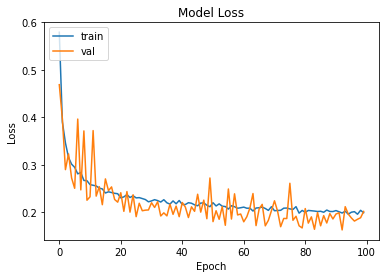

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for optimizer in HP_OPTIMIZER.domain.values:
    for dropout in HP_DROPOUT.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_OPTIMIZER: optimizer,
          HP_DROPOUT: dropout,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})

      hp.hparams(hparams)  # record the values used in this trial

      model = get_hyper_model(hparams)
      data = train_model(model)

      visualize_accuracy(data)
      visualize_loss(data)

      session_num += 1

## Final model

In [ ]:
def get_best_model():
  model = Sequential()

  model.add(Dense(256, input_shape=(9,)))
  model.add(LeakyReLU())
  model.add(Dropout(0.05))

  model.add(Dense(128))
  model.add(LeakyReLU())
  model.add(Dropout(0.05))

  model.add(Dense(128))
  model.add(LeakyReLU())
  model.add(Dropout(0.05))

  model.add(Dense(4, activation='softmax'))

  model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
best_model = get_best_model()

best_model_data = best_model.fit(train_dataset, train_classes,
          batch_size=64,
          epochs=30000,
          verbose = 1,
          validation_data=(val_dataset, val_classes))

Epoch 1/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.6653 - accuracy: 0.7428 - val_loss: 0.6156 - val_accuracy: 0.7657
Epoch 2/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.4397 - accuracy: 0.8193 - val_loss: 0.8553 - val_accuracy: 0.5572
Epoch 3/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8543 - val_loss: 0.3195 - val_accuracy: 0.8601
Epoch 4/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.3274 - accuracy: 0.8691 - val_loss: 0.3899 - val_accuracy: 0.8430
Epoch 5/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.8726 - val_loss: 0.3282 - val_accuracy: 0.8586
Epoch 6/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.8826 - val_loss: 0.2880 - val_accuracy: 0.8831
Epoch 7/30000
256/256 [==============================] - 1s 3ms/step - loss: 0.2780 - accuracy: 0.8869 - val_loss: 0.2951 - val_ac

KeyboardInterrupt: ignored

64/64 [==============================] - 0s 1ms/step - loss: 0.0836 - accuracy: 0.9711
ffNN took 0.11722445487976074 seconds


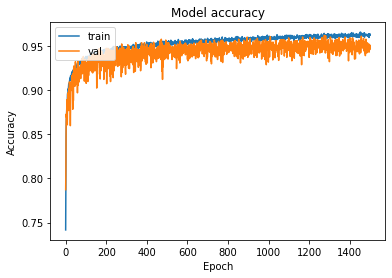

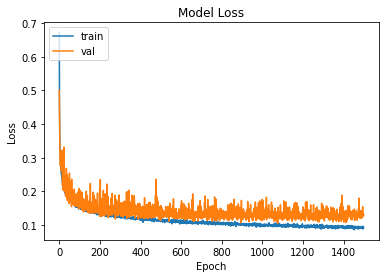

In [ ]:
start = time()
loss, acc = best_model.evaluate(test_dataset, test_classes, verbose=1)
end = time()
print('ffNN took ' + str(end - start) + ' seconds')

visualize_accuracy(best_model_data)
visualize_loss(best_model_data)